In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd


In [3]:
def int_10(x):
    number_hex_value = (hex(x))
    number_bin_value = (bin(x))
    number_oct_value = (oct(x))
    return print('The hex value of the number is {}, The oct value of the number is {}, The bin value of the number '
                 'is {}'.format(number_hex_value, number_oct_value, number_bin_value))
(int_10(256))

The hex value of the number is 0x100, The oct value of the number is 0o400, The bin value of the number is 0b100000000


In [15]:
cast = pd.read_csv('D:\downloads\cast.csv')
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3333690,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3333691,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3333692,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3333693,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# Question 1

In [24]:
Hamlet_movies=cast.loc[cast['title']=='Hamlet']
Hamlet_movies.drop_duplicates(subset='year', keep='first')
Hamlet_movies['year'].nunique()

17

# Question 2

In [25]:
res = cast[cast['title'].eq('Treasure Island')].filter(items=['title', 'year']).sort_values(by='year')
res.drop_duplicates()


,title,year
1312766,Treasure Island,1918
1404517,Treasure Island,1920
926924,Treasure Island,1934
1979467,Treasure Island,1950
961365,Treasure Island,1972
1954811,Treasure Island,1973
1137587,Treasure Island,1985
104905,Treasure Island,1999


# Question 3


In [13]:
res = cast[cast['title'].eq('Hamlet')]
res = res.query("year=='1921'")
res['n'].nunique()

9

# Question 4

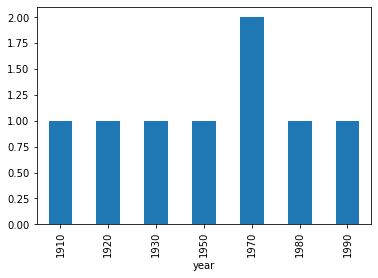

In [26]:
#if needed unique values
movies_named_hamlet=cast[(cast['title']=="Hamlet")] #took initail data frame and made new that only hamlet movies
hamelet_unique= res.groupby('year')['year'].nunique().sort_values(ascending=False).reset_index(name='index')#then made another data frame holding unique year values
hamelet_unique.groupby(hamelet_unique.year // 10 * 10).size().plot(kind='bar')


In [18]:
#select by n (lead actor)
cast1=cast.loc[cast['n']==1]
# select. again by the years 1950-1959
years1=cast1.loc[cast1['year']>=1950].loc[cast1['year']<1960].loc[cast1['type']=='actor']
print ("actors:")
       
print (years1.groupby('year').size())
print ()

years2=cast1.loc[cast1['year']>=1950].loc[cast1['year']<1960].loc[cast1['type']=='actress']
print ("actress:")
print(years2.groupby('year').size())

actors:
year
1950    604
1951    633
1952    591
1953    634
1954    626
1955    606
1956    614
1957    708
1958    694
1959    678
dtype: int64

actress:
year
1950    271
1951    272
1952    284
1953    290
1954    298
1955    264
1956    288
1957    284
1958    275
1959    287
dtype: int64


In [19]:

years3=cast1.loc[cast1['year']>=1990]
years3['name'].value_counts().head (10)

Mohanlal              126
Mammootty             118
Akshay Kumar           87
Jayaram                76
Andy Lau               72
Ajay Devgn             69
Eric Roberts           68
Amitabh Bachchan       68
Nagarjuna Akkineni     60
Dilip                  59
Name: name, dtype: int64

In [20]:
oz=cast[cast.name=='Frank Oz']
oz=oz.sort_values('year')
# data that organized by the title and the year of the movie
oz=oz.groupby(['year', 'title']).size()
# show only from one role and above
oz[oz>1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

In [21]:
cast['name'].value_counts(sort=True)
res = cast.query("n=='1'")
res

,title,year,name,type,character,n
88,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
125,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
130,Freelancers,2012,50 Cent,actor,Malo,1.0
131,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
132,Gun,2010,50 Cent,actor,Rich,1.0
...,...,...,...,...,...,...
3333513,Doyumsuz,1990,Bahar ?ztan,actress,Bahar,1.0
3333522,Kadife,2012,Ayta? ?ztuna,actress,Kadife Ana,1.0
3333556,Dig og mig,2008,Julie R. ?lgaard,actress,Stephanie,1.0
3333576,Mimi og madammerne,1998,Tammi ?st,actress,Mimi,1.0


In [ ]:
Frank_oz 